In [7]:
!pip install chefboost


In [9]:
from chefboost import Chefboost as chef
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("golf.txt")
df.head()

Saving golf.txt to golf (1).txt


,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [10]:
print("ID3 algorithm\n")

config = {'algorithm': 'ID3'}

print("Train model on traing dataset:")
model = chef.fit(df[:8].copy(), config)

xrow = ['Sunny','Hot','High','Weak']

#make prediction
prediction = chef.predict(model, xrow)
print("Prediction for given day. Should we play? {0}".format(prediction))

c=0
print("\nCompare predictions and expected results on TESTING dataset:")
#prediction test data set
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    print(actual,"-",prediction)
    if(actual==prediction):
        c=c+1
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

ID3 algorithm

Train model on traing dataset:
26-01-29 12:22:46 - ID3 tree is going to be built...
26-01-29 12:22:46 - -------------------------
26-01-29 12:22:46 - finished in 0.38660168647766113 seconds
26-01-29 12:22:46 - -------------------------
26-01-29 12:22:46 - Evaluate train set
26-01-29 12:22:46 - -------------------------
26-01-29 12:22:46 - Accuracy: 100.0% on 8 instances
26-01-29 12:22:46 - Labels: ['No' 'Yes']
26-01-29 12:22:46 - Confusion matrix: [[4, 0], [0, 4]]
26-01-29 12:22:46 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
Prediction for given day. Should we play? No

Compare predictions and expected results on TESTING dataset:
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3] == 'Weak':
/content/outputs/rules/rules.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ver

In [11]:
print("C4.5 algorithm\n")

#set algorithm
config = {'algorithm': 'C4.5'}
model = chef.fit(df[:8], config)

#define xrow
xrow  = ['Sunny','Hot','High','Weak']

#make single prediction
prediction = chef.predict(model,xrow)

#prediction on test data set
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']

    print(actual,"-",prediction)
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

C4.5 algorithm

26-01-29 12:22:56 - C4.5 tree is going to be built...
26-01-29 12:22:56 - -------------------------
26-01-29 12:22:56 - finished in 0.3802025318145752 seconds
26-01-29 12:22:56 - -------------------------
26-01-29 12:22:56 - Evaluate train set
26-01-29 12:22:56 - -------------------------
26-01-29 12:22:56 - Accuracy: 100.0% on 8 instances
26-01-29 12:22:56 - Labels: ['No' 'Yes']
26-01-29 12:22:56 - Confusion matrix: [[4, 0], [0, 4]]
26-01-29 12:22:56 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3] == 'Weak':
/content/outputs/rules/rules.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ver

In [12]:
print("CART algorithm\n")

#set algorithm
config = {'algorithm': 'CART'}
model = chef.fit(df[:8], config)

#define single x vector
xrow = ['Sunny','Hot','High','Weak']

#make single prediction
prediction = chef.predict(model, xrow)

#prediction on test data set
print("\nCompare predictions and expected results on TESTING dataset:")
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']

    print(actual,"-",prediction)
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

CART algorithm

26-01-29 12:23:04 - CART tree is going to be built...
26-01-29 12:23:05 - -------------------------
26-01-29 12:23:05 - finished in 0.37496018409729004 seconds
26-01-29 12:23:05 - -------------------------
26-01-29 12:23:05 - Evaluate train set
26-01-29 12:23:05 - -------------------------
26-01-29 12:23:05 - Accuracy: 100.0% on 8 instances
26-01-29 12:23:05 - Labels: ['No' 'Yes']
26-01-29 12:23:05 - Confusion matrix: [[4, 0], [0, 4]]
26-01-29 12:23:05 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%

Compare predictions and expected results on TESTING dataset:
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3] == 'Weak':
/content/outputs/rules/rules.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ver

In [13]:
uploaded = files.upload()
filename = next(iter(uploaded))
df= pd.read_csv("iris.data")
df = df.sample(frac=1).reset_index(drop=True)
df.head()

Saving iris.data to iris.data


,x1,x2,x3,x4,Decision
0,6.2,3.4,5.4,2.3,Iris-virginica
1,4.6,3.4,1.4,0.3,Iris-setosa
2,7.3,2.9,6.3,1.8,Iris-virginica
3,7.7,3.8,6.7,2.2,Iris-virginica
4,5.7,2.6,3.5,1.0,Iris-versicolor


In [14]:
print("ID3 algorithm\n")

#set algorithm
config = {'algorithm': 'ID3'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    #print(actual,"-",prediction)

print("C4.5 algorithm\n")

#set algorithm
config = {'algorithm': 'C4.5'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    print(actual,"-",prediction)

print("CART algorithm\n")

#set algorithm
config = {'algorithm': 'CART'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    #print(actual,"-",prediction)

ID3 algorithm

26-01-29 12:25:04 - ID3 tree is going to be built...
26-01-29 12:25:05 - -------------------------
26-01-29 12:25:05 - finished in 0.8092870712280273 seconds
26-01-29 12:25:05 - -------------------------
26-01-29 12:25:05 - Evaluate train set
26-01-29 12:25:05 - -------------------------
26-01-29 12:25:05 - Accuracy: 99.0% on 100 instances
26-01-29 12:25:05 - Labels: ['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']
26-01-29 12:25:05 - Confusion matrix: [[36, 0, 0], [0, 33, 0], [1, 0, 30]]
26-01-29 12:25:05 - Decision Iris-virginica
26-01-29 12:25:05 - Accuracy: 99.0
26-01-29 12:25:05 - Precision: 100.0%, Recall: 97.2973%, F1: 98.6301%
26-01-29 12:25:05 - Decision Iris-setosa
26-01-29 12:25:05 - Accuracy: 100.0
26-01-29 12:25:05 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
26-01-29 12:25:05 - Decision Iris-versicolor
26-01-29 12:25:05 - Accuracy: 99.0
26-01-29 12:25:05 - Precision: 96.7742%, Recall: 100.0%, F1: 98.3607%
C4.5 algorithm

26-01-29 12:25:05 - C4.5 tree i

/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3] == 'Weak':
/content/outputs/rules/rules.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

26-01-29 12:25:06 - -------------------------
26-01-29 12:25:06 - finished in 1.2220683097839355 seconds
26-01-29 12:25:06 - -------------------------
26-01-29 12:25:06 - Evaluate train set
26-01-29 12:25:06 - -------------------------
26-01-29 12:25:06 - Accuracy: 99.0% on 100 instances
26-01-29 12:25:06 - Labels: ['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']
26-01-29 12:25:06 - Confusion matrix: [[36, 0, 0], [0, 33, 0], [1, 0, 30]]
26-01-29 12:25:06 - Decision Iris-virginica
26-01-29 12:25:06 - Accuracy: 99.0
26-01-29 12:25:06 - Precision: 100.0%, Recall: 97.2973%, F1: 98.6301%
26-01-29 12:25:06 - Decision Iris-setosa
26-01-29 12:25:06 - Accuracy: 100.0
26-01-29 12:25:06 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
26-01-29 12:25:06 - Decision Iris-versicolor
26-01-29 12:25:06 - Accuracy: 99.0
26-01-29 12:25:06 - Precision: 96.7742%, Recall: 100.0%, F1: 98.3607%
Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-versicolor - Iris-versicolor
Iris-versicolor - Iri

/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3] == 'Weak':
/content/outputs/rules/rules.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-virginica - Iris-virginica
Iris-setosa - Iris-setosa
Iris-versicolor - Iris-virginica
Iris-virginica - Iris-virginica
Iris-versicolor - Iris-virginica
Iris-setosa - Iris-setosa
Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-versicolor - Iris-versicolor
Iris-virginica - Iris-virginica
Iris-virginica - Iris-virginica
Iris-setosa - Iris-setosa
Iris-virginica - Iris-virginica
Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-virginica - Iris-virginica
Iris-versicolor - Iris-virginica
Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-versicolor - Iris-versicolor
Iris-virginica - Iris-versicolor
CART algorithm

26-01-29 12:25:06 - CART tree is going to be built...
26-01-29 12:25:07 - -------------------------
26-01-29 12:25:07 - finished in 1.0244686603546143 seconds
26-01-29 12:25:07 - -------------------------
26-01-29 12:25:07 - Evaluate train set
26-01-29 12:25:07 - ----------

/content/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/content/outputs/rules/rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
/content/outputs/rules/rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3] == 'Weak':
/content/outputs/rules/rules.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

135
Confusion matrix results:
[[15]]
Classification report
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


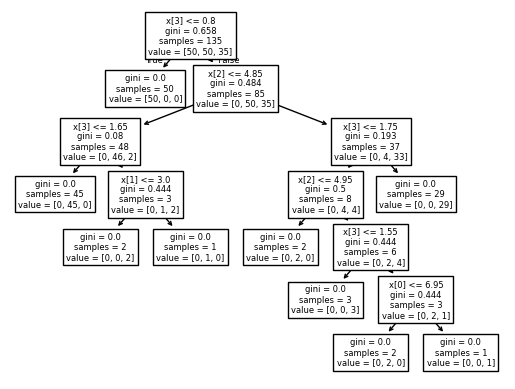

In [15]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
tSize=int(X.shape[0]*0.9)
print(tSize)
X_train=X[0:tSize,:]
y_train=y[0:tSize]

X_test=X[tSize:,:]
y_test=y[tSize:]

clf = tree.DecisionTreeClassifier()

#train decision tree on training set
clf = clf.fit(X_train, y_train)

#predict values on testing set
y_pred=clf.predict(X_test);



tree.plot_tree(clf)
#!pip install graphviz

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix results:")
print(confusion_matrix(y_test,y_pred))

print("Classification report")
print(classification_report(y_test, y_pred))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_iris(return_X_y=True)

indices = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

#Chia train/test
X_train = X[:100]
y_train = y[:100]
X_test = X[100:]
y_test = y[100:]

print(f"Train: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")
print(f"Test class distribution: {np.bincount(y_test)}")

#simulation với boosting
boosted_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
    n_estimators=10,
    random_state=42
)
boosted_model.fit(X_train, y_train)
y_pred = boosted_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nC5.0 Simulation Accuracy: {accuracy:.2%}")

Train: 100 samples
Test: 50 samples
Test class distribution: [13 18 19]

C5.0 Simulation Accuracy: 96.00%
